# Taller 10


Natali Andre Julio Beltran - CC 1098807231\
Brayan Alejandro Murillo González - CC 1007338060


In [1]:
import scipy as sc
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.integrate import odeint 

In [2]:

# Función desacoplada para la solución matricial
def fun(y,t,params):
  w = params[0]
  return[y[1],-w*y[0]]

In [3]:
# Constantes de elasticidad
k1 = 0.2
k3 = k1
k2 = 0.4

# Masa, (suponiendo m1 = m2 = m)
m = 0.5


# Matriz de constantes de elasticidad 
A = np.array([[k1+k2,-k2],[-k2,k2+k3]])
A = np.asmatrix(A)

# Solución Matricial de las ecuaciones diferenciales 

In [4]:
def edom(A,ciη1,ciη2,m,graphic=True,w=True,data=True):

  # Valores propios de A 
  ava = la.eig(A)[0] 
  λ = ava
  # Vectores propios de A 
  ave = la.eig(A)[1] 
  ave = np.asmatrix(ave) # Matriz donde las filas son los vectores propios

  S = ave.transpose() # Matriz S de transformación, a partir de los vectores propios como columnas
                      # los vectores propios estan como vectores filas, hay que pasarlos a vectores columnas
                      # para ello se transpone la matriz de vectores filas.

  ω = λ/m  # Valores de ω_1^2 y ω_2^2
  w1 = ω[0]
  w2 = ω[1]
  t = np.linspace(1e-8,10,1000)  # Tiempo de integración
  
  params1 = [w1]
  params2 = [w2]

  val1 =  odeint(fun,ci1,t,args=(params1,))  # Solucion para η1
  val2 =  odeint(fun,ci2,t,args=(params2,))  # Solucion para η2

  η1_pos = val1[:,0] # posicion en el tiempo para η1
  η1_vel = val1[:,1] # Velocidad en el tiempo para η1

  η2_pos = val2[:,0] # posicion en el tiempo para η2
  η2_vel = val2[:,1] # Velocidad en el tiempo para η2


  if graphic:
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.plot(t, η1_pos) # posicion en funcion del tiempo
    plt.xlabel("$t$",fontsize=14)    #nombre del eje x
    plt.ylabel("$\eta_1(t)$",fontsize=14) #nombre del eje y
    plt.grid()
    plt.show()

    plt.figure(figsize=(10,8))
    plt.subplot(212)
    plt.plot(t, η2_pos) # posicion en funcion del tiempo
    plt.xlabel("$t$",fontsize=14)    #nombre del eje x
    plt.ylabel("$\eta_2(t)$",fontsize=14) #nombre del eje y
    plt.grid()
    plt.show()

  if w:
    return [w1,w2]
  if data:
    return[η1_pos,η2_pos]

# Condiciones iniciales con situación simétrica

Sabiendo que : 
$$\eta_1(t) = \frac{1}{\sqrt{2}}(x_1(t)-x_2(t))$$

$$\eta_2(t) = \frac{1}{\sqrt{2}}(x_1(t)+x_2(t))$$


**Para las condiciones simétricas**

$$x_1(0)=x_2(0)=K $$\
$$x_1'(0)=x_2'(0)=0$$
se tiene que :
$$\eta_1(0) = 0$$
$$\eta_2(0) = \frac{2}{\sqrt{2}} K $$
$$\eta_1'(0) = 0$$
$$\eta_2'(0) = 0$$


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


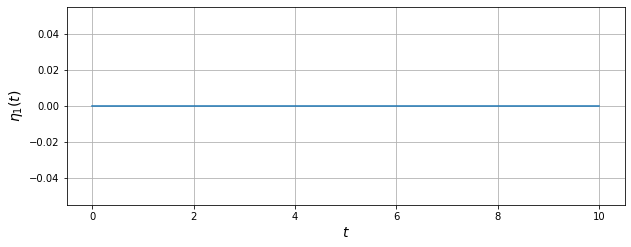

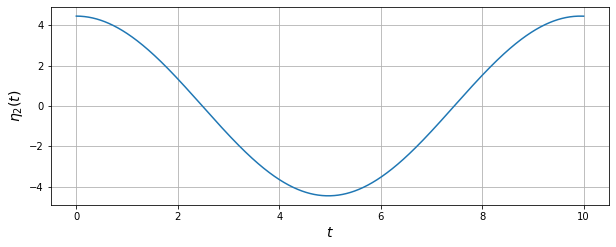

In [5]:
# Solución matricial

x1_0 = np.pi           # Condicion de posicion inicial para x1(0)
x1v_0 = 0              # Condicion de velocidad inicial para x1'(0)

x2_0 = np.pi           # Condicion de posicion inicial para x2(0)
x2v_0 = 0              # Condicion de velocidad inicial para x2'(0)

η1_0 = 0                   # Condicion de posicion inicial para η1(0)
η1v_0 = 0                  # Condicion de velocidad inicial para η1'(0)
ci1 = [η1_0,η1v_0]         # Arreglo con las condiciones iniciales para η1


η2_0 = (2/np.sqrt(2))*np.pi # Condicion de posicion inicial para η2(0)
η2v_0 =0                    # Condicion de velocidad inicial para η2'(0)
ci2 = [η2_0,η2v_0]          # Arreglo con las condiciones iniciales para η2

sol = edom(A,ci1,ci2,0.5,graphic=True,w=False,data=False) # Imprimimos solo la grafica
sol # Solucion de las dos ecuaciones para η1 y η2 con sus graficas 

# Solucion analitica de $η_1$,$η_2$ con la situación simétrica




/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


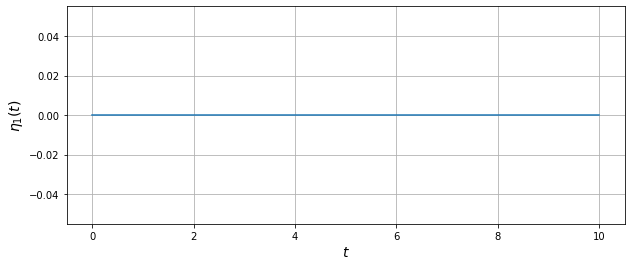

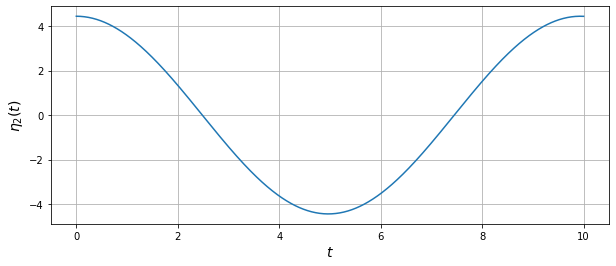

In [6]:

sol = edom(A,ci1,ci2,0.5,graphic=False,w=True,data=False) # Mostramos solo los valores de w

t = np.linspace(1e-8,10,1000)  # Tiempo de integración



fun1 = lambda t: η1_0*np.cos(np.sqrt(sol[0])*t)+(η1v_0/(np.sqrt(sol[0])))*np.sin(sol[0]*t) # Solución analítica de η1

# Grafica de la solución analítica para η1
fig1 = plt.figure(figsize = (10 , 4))
plt.plot(t , fun1(t))
plt.xlabel("$t$",fontsize=14)
plt.ylabel("$\eta_1(t)$",fontsize=14)
plt.grid()



fun2 = lambda t: η2_0*np.cos(np.sqrt(sol[1])*t)+(η2v_0/(np.sqrt(sol[1])))*np.sin(sol[1]*t) # Solución analítica de η2


# Grafica de la solución analítica para η2
fig1 = plt.figure(figsize=(10,4))
plt.plot(t,fun2(t))
plt.xlabel("$t$",fontsize=14)
plt.ylabel("$\eta_2(t)$",fontsize=14)
plt.grid()

#Haciendo las transformaciones: 
\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2-\eta_1)
\end{equation}

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


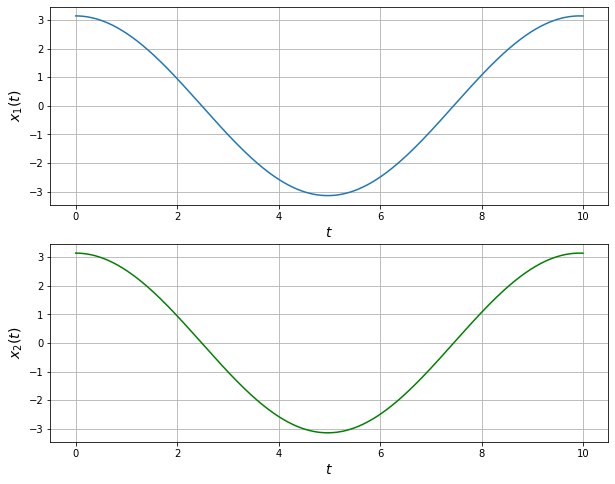

In [7]:
sol = edom(A,ci1,ci2,0.5,graphic=False,w=False,data=True) # Le pedimos a la funcion que nos retorne solo los datos de posicion y velocidad

x1 = (1/np.sqrt(2))*(sol[0]+sol[1]) # Transformaciones para x1
x2 = (1/np.sqrt(2))*(sol[1]-sol[0]) # Transformaciones para x2

# Graficas para x1(t) y x2(t)

fig1 = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, x1) # posicion en funcion del tiempo
plt.xlabel("$t$",fontsize=14)    #nombre del eje x
plt.ylabel("$x_1(t)$",fontsize=14)
plt.grid()


plt.subplot(212)
plt.plot(t,x2,color="green")  #velocidad en funcion del tiempo
plt.xlabel("$t$",fontsize=14)   #nombre del eje x
plt.ylabel("$x_2(t)$",fontsize=14)
plt.grid()
plt.show()

# Comprobación analítica para $x_1(t)$ , $x_2(t)$ con la situación simétrica

In [8]:
sol = edom(A,ci1,ci2,0.5,graphic=False,w=True,data=False)  # Solucion matricial de la ecuacion diferencial, le pedimos que solo nos devulva
                                                            # los valores de w

w1=np.sqrt(sol[0])  # frecuencia angular 1
w2=np.sqrt(sol[1])  # frecuencia angular 2

# Función analítica para x1(t)
def x_1(t,w1,w2):
 T1 = (0.5)*(x1_0-x2_0)*np.cos(w1*t)
 T2 = (0.5/w1)*(x1v_0-x2v_0)*np.sin(w1*t)
 T3 = (0.5)*(x1_0+x2_0)*np.cos(w2*t)
 T4 = (0.5/w2)*(x1v_0+x2v_0)*np.sin(w2*t)
 return T1+T2+T3+T4

# Función analítica para x2(t)
def x_2(t,w1,w2):
 T1 = (0.5)*(x2_0-x1_0)*np.cos(w1*t)
 T2 = (0.5/w1)*(x2v_0-x1v_0)*np.sin(w1*t)
 T3 = (0.5)*(x1_0+x2_0)*np.cos(w2*t)
 T4 = (0.5/w2)*(x1v_0+x2v_0)*np.sin(w2*t)
 return T1+T2+T3+T4

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


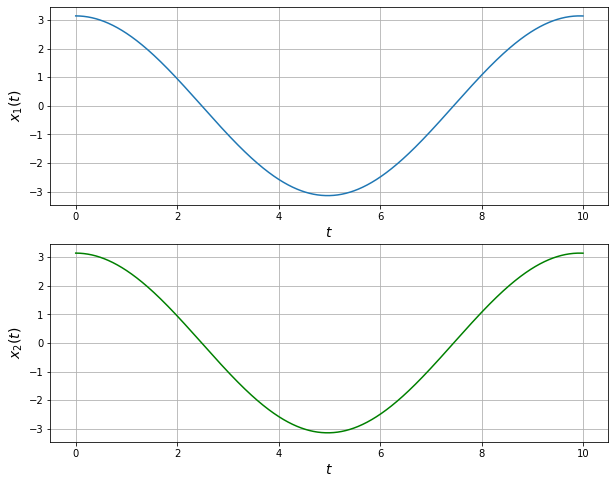

In [9]:

# Grafica de la solución analítica x1(t)

fig1 = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, x_1(t,w1,w2))          # posicion en funcion del tiempo
plt.xlabel("$t$",fontsize=14)      # nombre del eje x
plt.ylabel("$x_1(t)$",fontsize=14) # nombre del eje y
plt.grid()


# Grafica de la solución analítica x2(t)
plt.subplot(212)
plt.plot(t,x_2(t,w1,w2),color="green")  
plt.xlabel("$t$",fontsize=14)      # nombre del eje x
plt.ylabel("$x_2(t)$",fontsize=14) # nombre del eje y
plt.grid()
plt.show()

# Solucion de la ecuacion diferencial acoplada con situacion simétrica usando Odeint

In [10]:
# Función a introducir en Odeint

def f(x1,t,params):  
  k1 = params[0]
  k2 = params[1]   # Ctes de elasticidad
  m1 = params[2]
  
  
  dx1dt = x1[2]  # Velocidad
  dx2dt = x1[3]
  dv1dt = (-(k1/m)*x1[0])+((k2/m)*(x1[1]-x1[0]))
  dv2dt = (-(k1/m)*x1[1])-((k2/m)*(x1[1]-x1[0]))
  
  return[dx1dt,dx2dt,dv1dt,dv2dt]

In [11]:
x0 = np.array([x1_0,x2_0,x1v_0,x2v_0])  # Condiciones iniciales simétricas
params= [k1,k2,m] # parámetros

x1=odeint(f,x0,t,args=(params,)) # Solucion del sistema acoplado

X1=x1[:,0]  #posiciones x1
X2=x1[:,1]  #posiciones x2
X3=x1[:,2]  #velocidades v1
X4=x1[:,3]  #velocidaades v2

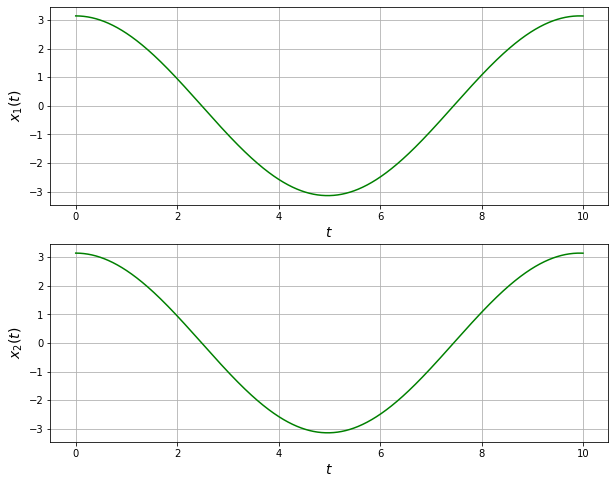

In [12]:

# Grafica de x1(t) 
fig1 = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, X1,color="green")

plt.xlabel("$t$",fontsize=14)    #nombre del eje x
plt.ylabel("$x_1(t)$",fontsize=14) #nombre del eje y
plt.grid()

# Gráfica de x2(t)
plt.subplot(212)
plt.plot(t,X2,color="green")

plt.xlabel("$t$",fontsize=14)     # nombre del eje x
plt.ylabel("$x_2(t)$",fontsize=14)# nombre del eje y
plt.grid()
plt.show()

# Condiciones iniciales con situación asimétrica

Sabiendo que : 
$$\eta_1(t) = \frac{1}{\sqrt{2}}(x_1(t)-x_2(t))$$

$$\eta_2(t) = \frac{1}{\sqrt{2}}(x_1(t)+x_2(t))$$


**Para las condiciones simétricas**

$$x_1(0)=K$$
$$x_2(0)=-K $$\
$$x_1'(0)=x_2'(0)=0$$
se tiene que :
$$\eta_1(0) = \frac{2}{\sqrt{2}} K $$
$$\eta_2(0) = 0 $$\
$$\eta_1'(0) = 0$$
$$\eta_2'(0) = 0$$

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


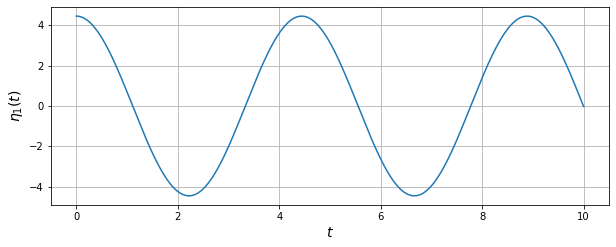

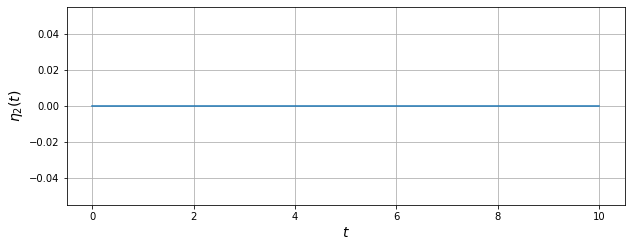

In [13]:
# Solución matricial

x1_0 = np.pi           # Condicion de posicion inicial para x1(0)
x1v_0 = 0              # Condicion de velocidad inicial para x1'(0)

x2_0 = -np.pi           # Condicion de posicion inicial para x2(0)
x2v_0 = 0              # Condicion de velocidad inicial para x2'(0)

η1_0 = (2/np.sqrt(2))*np.pi      # Condicion de posicion inicial para η1(0)
η1v_0 = 0                  # Condicion de velocidad inicial para η1'(0)
ci1 = [η1_0,η1v_0]         # Arreglo con las condiciones iniciales para η1


η2_0 = 0                    # Condicion de posicion inicial para η2(0)
η2v_0 =0                    # Condicion de velocidad inicial para η2'(0)
ci2 = [η2_0,η2v_0]          # Arreglo con las condiciones iniciales para η2

sol = edom(A,ci1,ci2,0.5,graphic=True,w=False,data=False) # Imprimimos solo las gráficas
sol # Solucion de las dos ecuaciones para η1 y η2 con sus graficas 

# Solucion analitica de $η_1$,$η_2$ con la situación Asimétrica

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


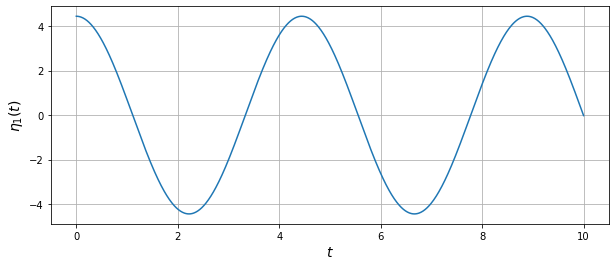

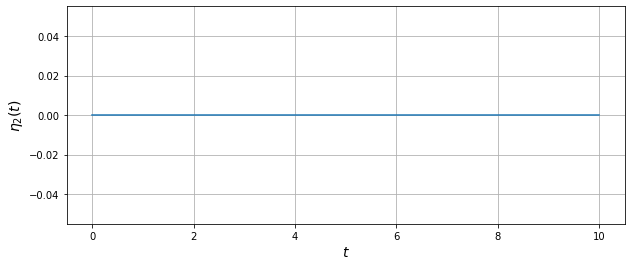

In [14]:

sol = edom(A,ci1,ci2,0.5,graphic=False,w=True,data=False)

t = np.linspace(1e-8,10,1000)  # Tiempo de integración



fun1 = lambda t: η1_0*np.cos(np.sqrt(sol[0])*t)+(η1v_0/(np.sqrt(sol[0])))*np.sin(sol[0]*t) # Solución analítica de η1

# Grafica de la solución analítica para η1
fig1 = plt.figure(figsize = (10 , 4))
plt.plot(t , fun1(t))
plt.xlabel("$t$",fontsize=14)
plt.ylabel("$\eta_1(t)$",fontsize=14)
plt.grid()



fun2 = lambda t: η2_0*np.cos(np.sqrt(sol[1])*t)+(η2v_0/(np.sqrt(sol[1])))*np.sin(sol[1]*t) # Solución analítica de η2


# Grafica de la solución analítica para η2
fig1 = plt.figure(figsize=(10,4))
plt.plot(t,fun2(t))
plt.xlabel("$t$",fontsize=14)
plt.ylabel("$\eta_2(t)$",fontsize=14)
plt.grid()

#Haciendo las transformaciones: 
\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2-\eta_1)
\end{equation}

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


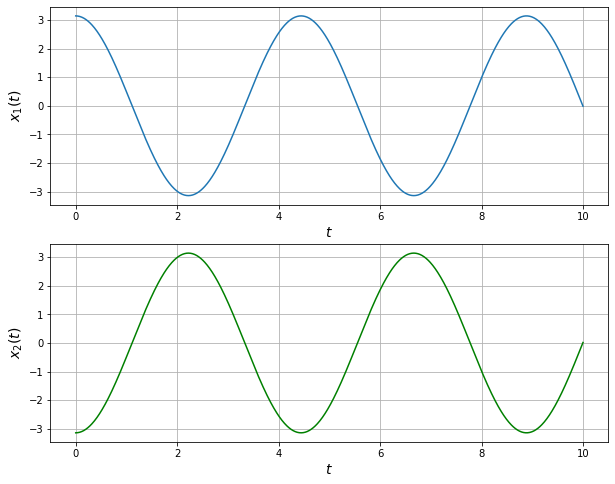

In [15]:
sol = edom(A,ci1,ci2,0.5,graphic=False,w=False,data=True)

x1 = (1/np.sqrt(2))*(sol[0]+sol[1]) # Transformaciones para x1
x2 = (1/np.sqrt(2))*(sol[1]-sol[0]) # Transformaciones para x2

# Graficas para x1(t) y x2(t)

fig1 = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, x1) # posicion en funcion del tiempo
plt.xlabel("$t$",fontsize=14)    #nombre del eje x
plt.ylabel("$x_1(t)$",fontsize=14)
plt.grid()


plt.subplot(212)
plt.plot(t,x2,color="green")  #velocidad en funcion del tiempo
plt.xlabel("$t$",fontsize=14)   #nombre del eje x
plt.ylabel("$x_2(t)$",fontsize=14)
plt.grid()
plt.show()

# Comprobación analítica para $x_1(t)$ , $x_2(t)$ con la situación simétrica

In [16]:
sol = edom(A,ci1,ci2,0.5,graphic=False,w=True,data=False)  # Solucion matricial de la ecuacion diferencial, le pedimos que solo nos devulva
                                                            # los valores de w

w1=np.sqrt(sol[0])  # frecuencia angular 1
w2=np.sqrt(sol[1])  # frecuencia angular 2

# Función analítica para x1(t)
def x_1(t,w1,w2):
 T1 = (0.5)*(x1_0-x2_0)*np.cos(w1*t)
 T2 = (0.5/w1)*(x1v_0-x2v_0)*np.sin(w1*t)
 T3 = (0.5)*(x1_0+x2_0)*np.cos(w2*t)
 T4 = (0.5/w2)*(x1v_0+x2v_0)*np.sin(w2*t)
 return T1+T2+T3+T4

# Función analítica para x2(t)
def x_2(t,w1,w2):
 T1 = (0.5)*(x2_0-x1_0)*np.cos(w1*t)
 T2 = (0.5/w1)*(x2v_0-x1v_0)*np.sin(w1*t)
 T3 = (0.5)*(x1_0+x2_0)*np.cos(w2*t)
 T4 = (0.5/w2)*(x1v_0+x2v_0)*np.sin(w2*t)
 return T1+T2+T3+T4

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


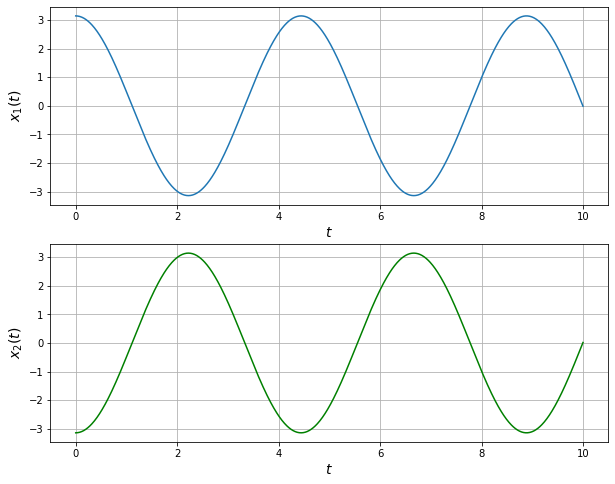

In [17]:

# Grafica de la solución analítica x1(t)

fig1 = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, x_1(t,w1,w2))          # posicion en funcion del tiempo
plt.xlabel("$t$",fontsize=14)      # nombre del eje x
plt.ylabel("$x_1(t)$",fontsize=14) # nombre del eje y
plt.grid()


# Grafica de la solución analítica x2(t)
plt.subplot(212)
plt.plot(t,x_2(t,w1,w2),color="green")  
plt.xlabel("$t$",fontsize=14)      # nombre del eje x
plt.ylabel("$x_2(t)$",fontsize=14) # nombre del eje y
plt.grid()
plt.show()

# Solucion de la ecuacion diferencial acoplada con situación simétrica simétrica usando Odeint

In [18]:
# Función a introducir en Odeint

def f(x1,t,params):  
  k1 = params[0]
  k2 = params[1]   # Ctes de elasticidad
  m1 = params[2]
  
  
  dx1dt = x1[2]  # Velocidad
  dx2dt = x1[3]
  dv1dt = (-(k1/m)*x1[0])+((k2/m)*(x1[1]-x1[0]))
  dv2dt = (-(k1/m)*x1[1])-((k2/m)*(x1[1]-x1[0]))
  
  return[dx1dt,dx2dt,dv1dt,dv2dt]

In [19]:
x0 = np.array([x1_0,x2_0,x1v_0,x2v_0])  # Condiciones iniciales simétricas
params= [k1,k2,m] # parámetros

x1=odeint(f,x0,t,args=(params,)) # Solucion del sistema acoplado

X1=x1[:,0]  #posiciones x1
X2=x1[:,1]  #posiciones x2
X3=x1[:,2]  #velocidades v1
X4=x1[:,3]  #velocidaades v2

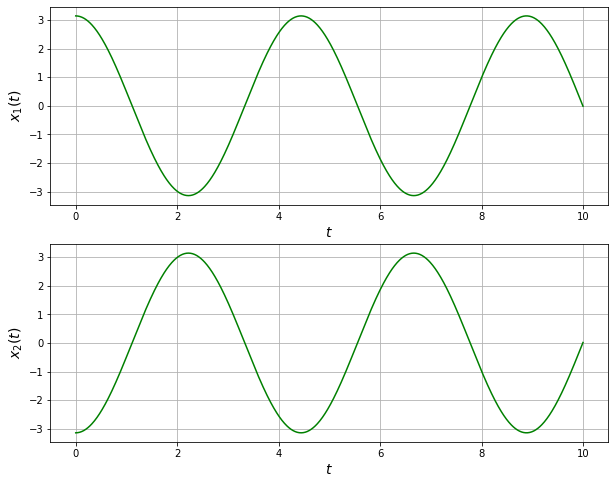

In [20]:

# Grafica de x1(t) 
fig1 = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, X1,color="green")

plt.xlabel("$t$",fontsize=14)    #nombre del eje x
plt.ylabel("$x_1(t)$",fontsize=14) #nombre del eje y
plt.grid()

# Gráfica de x2(t)
plt.subplot(212)
plt.plot(t,X2,color="green")

plt.xlabel("$t$",fontsize=14)     # nombre del eje x
plt.ylabel("$x_2(t)$",fontsize=14)# nombre del eje y
plt.grid()
plt.show()

# Condiciones iniciales con :


$$x_1(0)=K$$
$$x_2(0)=0 $$\
$$x_1'(0)=x_2'(0)=0$$
se tiene que :
$$\eta_1(0) = \frac{k}{\sqrt{2}}  $$
$$\eta_2(0) = \frac{k}{\sqrt{2}} $$\
$$\eta_1'(0) = 0$$
$$\eta_2'(0) = 0$$

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


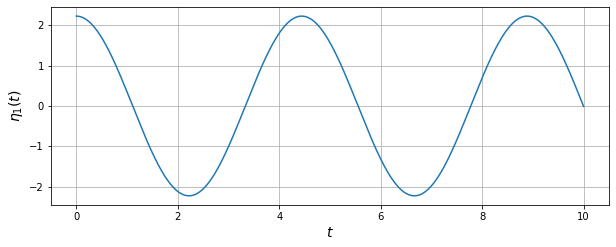

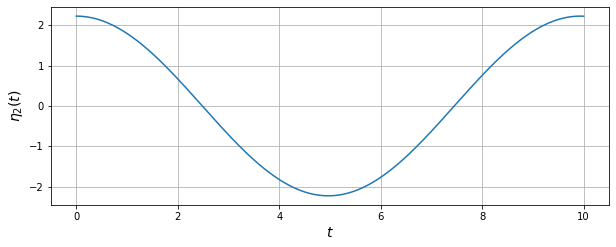

In [21]:
# Solución matricial

x1_0 = np.pi           # Condicion de posicion inicial para x1(0)
x1v_0 = 0              # Condicion de velocidad inicial para x1'(0)

x2_0 = 0          # Condicion de posicion inicial para x2(0)
x2v_0 = 0              # Condicion de velocidad inicial para x2'(0)

η1_0 = (np.pi/np.sqrt(2))     # Condicion de posicion inicial para η1(0)
η1v_0 = 0                  # Condicion de velocidad inicial para η1'(0)
ci1 = [η1_0,η1v_0]         # Arreglo con las condiciones iniciales para η1


η2_0 = (np.pi/np.sqrt(2))                 # Condicion de posicion inicial para η2(0)
η2v_0 =0                    # Condicion de velocidad inicial para η2'(0)
ci2 = [η2_0,η2v_0]          # Arreglo con las condiciones iniciales para η2

sol = edom(A,ci1,ci2,0.5,graphic=True,w=False,data=False) # Imprimimos solo las gráficas
sol # Solucion de las dos ecuaciones para η1 y η2 con sus graficas 

# Solucion analitica de $η_1$,$η_2$

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


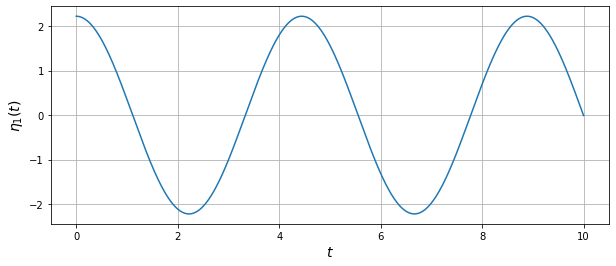

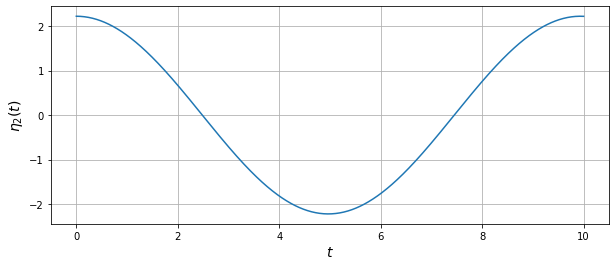

In [22]:

sol = edom(A,ci1,ci2,0.5,graphic=False,w=True,data=False) # Mostramos solo los valores de w

t = np.linspace(1e-8,10,1000)  # Tiempo de integración



fun1 = lambda t: η1_0*np.cos(np.sqrt(sol[0])*t)+(η1v_0/(np.sqrt(sol[0])))*np.sin(sol[0]*t) # Solución analítica de η1

# Grafica de la solución analítica para η1
fig1 = plt.figure(figsize = (10 , 4))
plt.plot(t , fun1(t))
plt.xlabel("$t$",fontsize=14)
plt.ylabel("$\eta_1(t)$",fontsize=14)
plt.grid()



fun2 = lambda t: η2_0*np.cos(np.sqrt(sol[1])*t)+(η2v_0/(np.sqrt(sol[1])))*np.sin(sol[1]*t) # Solución analítica de η2


# Grafica de la solución analítica para η2
fig1 = plt.figure(figsize=(10,4))
plt.plot(t,fun2(t))
plt.xlabel("$t$",fontsize=14)
plt.ylabel("$\eta_2(t)$",fontsize=14)
plt.grid()

#Haciendo las transformaciones: 
\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2-\eta_1)
\end{equation}

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


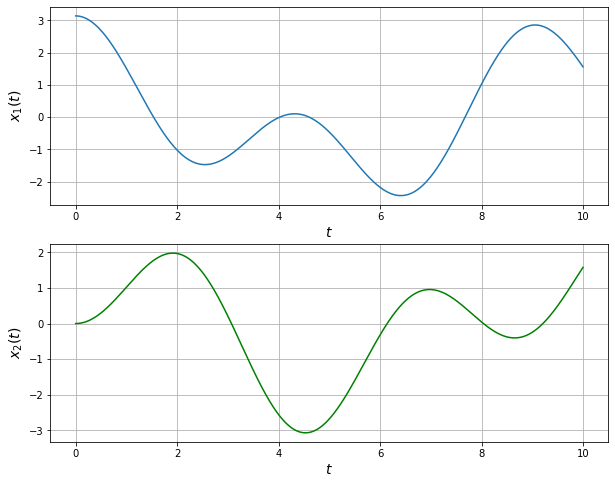

In [23]:
sol = edom(A,ci1,ci2,0.5,graphic=False,w=False,data=True) # Le pedimos a la funcion que nos retorne solo los datos de posicion y velocidad

x1 = (1/np.sqrt(2))*(sol[0]+sol[1]) # Transformaciones para x1
x2 = (1/np.sqrt(2))*(sol[1]-sol[0]) # Transformaciones para x2

# Graficas para x1(t) y x2(t)

fig1 = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, x1) # posicion en funcion del tiempo
plt.xlabel("$t$",fontsize=14)    #nombre del eje x
plt.ylabel("$x_1(t)$",fontsize=14)
plt.grid()


plt.subplot(212)
plt.plot(t,x2,color="green")  #velocidad en funcion del tiempo
plt.xlabel("$t$",fontsize=14)   #nombre del eje x
plt.ylabel("$x_2(t)$",fontsize=14)
plt.grid()
plt.show()

# Comprobación analítica para $x_1(t)$ , $x_2(t)$ 

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


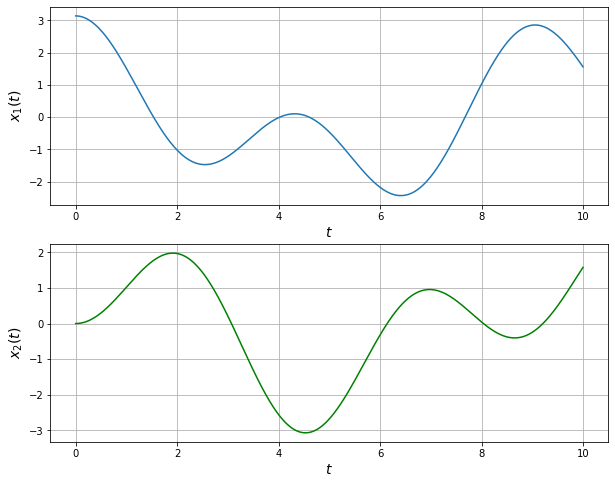

In [24]:
sol = edom(A,ci1,ci2,0.5,graphic=False,w=True,data=False)  # Solucion matricial de la ecuacion diferencial, le pedimos que solo nos devulva
                                                            # los valores de w

w1=np.sqrt(sol[0])  # frecuencia angular 1
w2=np.sqrt(sol[1])  # frecuencia angular 2

# Función analítica para x1(t)
def x_1(t,w1,w2):
 T1 = (0.5)*(x1_0-x2_0)*np.cos(w1*t)
 T2 = (0.5/w1)*(x1v_0-x2v_0)*np.sin(w1*t)
 T3 = (0.5)*(x1_0+x2_0)*np.cos(w2*t)
 T4 = (0.5/w2)*(x1v_0+x2v_0)*np.sin(w2*t)
 return T1+T2+T3+T4

# Función analítica para x2(t)
def x_2(t,w1,w2):
 T1 = (0.5)*(x2_0-x1_0)*np.cos(w1*t)
 T2 = (0.5/w1)*(x2v_0-x1v_0)*np.sin(w1*t)
 T3 = (0.5)*(x1_0+x2_0)*np.cos(w2*t)
 T4 = (0.5/w2)*(x1v_0+x2v_0)*np.sin(w2*t)
 return T1+T2+T3+T4


# Grafica de la solución analítica x1(t)

fig1 = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, x_1(t,w1,w2))          # posicion en funcion del tiempo
plt.xlabel("$t$",fontsize=14)      # nombre del eje x
plt.ylabel("$x_1(t)$",fontsize=14) # nombre del eje y
plt.grid()


# Grafica de la solución analítica x2(t)
plt.subplot(212)
plt.plot(t,x_2(t,w1,w2),color="green")  
plt.xlabel("$t$",fontsize=14)      # nombre del eje x
plt.ylabel("$x_2(t)$",fontsize=14) # nombre del eje y
plt.grid()
plt.show()

# Solucion de la ecuacion diferencial acoplada usando Odeint

In [25]:
# Función a introducir en Odeint

def f(x1,t,params):  
  k1 = params[0]
  k2 = params[1]   # Ctes de elasticidad
  m1 = params[2]
  
  
  dx1dt = x1[2]  # Velocidad
  dx2dt = x1[3]
  dv1dt = (-(k1/m)*x1[0])+((k2/m)*(x1[1]-x1[0]))
  dv2dt = (-(k1/m)*x1[1])-((k2/m)*(x1[1]-x1[0]))
  
  return[dx1dt,dx2dt,dv1dt,dv2dt]

In [26]:
x0 = np.array([x1_0,x2_0,x1v_0,x2v_0])  # Condiciones iniciales simétricas
params= [k1,k2,m] # parámetros

x1=odeint(f,x0,t,args=(params,)) # Solucion del sistema acoplado

X1=x1[:,0]  #posiciones x1
X2=x1[:,1]  #posiciones x2
X3=x1[:,2]  #velocidades v1
X4=x1[:,3]  #velocidaades v2

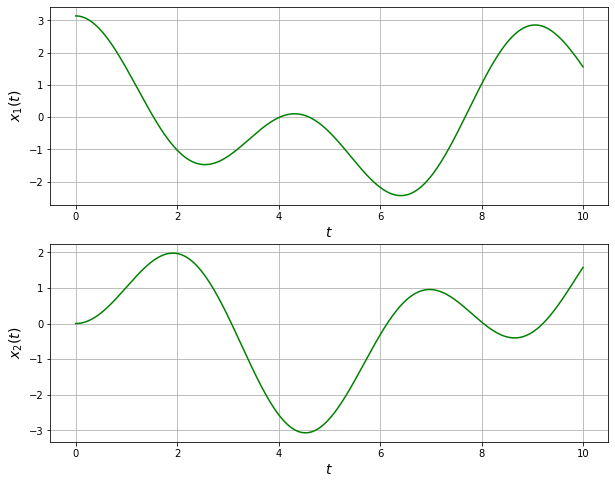

In [27]:

# Grafica de x1(t) 
fig1 = plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t, X1,color="green")

plt.xlabel("$t$",fontsize=14)    #nombre del eje x
plt.ylabel("$x_1(t)$",fontsize=14) #nombre del eje y
plt.grid()

# Gráfica de x2(t)
plt.subplot(212)
plt.plot(t,X2,color="green")

plt.xlabel("$t$",fontsize=14)     # nombre del eje x
plt.ylabel("$x_2(t)$",fontsize=14)# nombre del eje y
plt.grid()
plt.show()

# Conclusiones:

1. Se observa que en los 3 casos tanto la solución matricial como la solución por odeint se acomoda al resultado esperado analíticamente
2. Se observa que en la solución matricial, como se trata el problema como si fuesen dos osciladores independientes, cuando las condiciones iniciales de alguno de los dos estan en 0, el oscilador se queda quieto en el tiempo
3. Resulta más cómodo trabajar con odeint ya que podemos hacerlo más resumidamente
4. En el caso simétrico se observa que los dos osciladores tienen la misma solución para la posición en el tiempo
5. En el caso antisimétrico se observa que un oscilador es el reflejo negativo del otro para la posición en el tiempo
6. En el tercer caso se observa que los dos osciladores se mueven en conjunto, asi que sus posiciones se iran sumando y restando dando como resultado una suma de funciones seno y coseno